In [82]:
import pandas as pd
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

## 统计缺失的问题

In [83]:
wheat13 = pd.read_pickle('./data/185day_data13.df')

In [84]:
wheat13.groupby('Location').apply(lambda x: x.Date.max() - x.Date.min()).value_counts()

185 days    935
184 days      6
152 days      6
182 days      3
dtype: int64

数据中首尾两条数据时间差与DayINSeason不符删去不足185天的数据

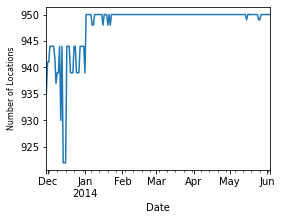

In [95]:
plt.figure(figsize=(4, 3))
wheat13.groupby('Date').Location.count().plot()
plt.ylabel('Number of Locations', fontsize=8)
plt.savefig('./figures/date&locations(origin).png', dpi=600, bbox_inches = 'tight')

In [86]:
days = wheat13.groupby('Location').apply(lambda x: x.Date.max() - x.Date.min())

In [87]:
clean_pos = days[days == timedelta(days=185)].index.to_list()

In [88]:
wheat13_185days_nonmiss = wheat13[wheat13.Location.isin(clean_pos)]

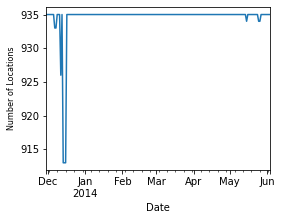

In [89]:
plt.figure(figsize=(4, 3))
wheat13_185days_nonmiss.groupby('Date').Location.count().plot()
plt.ylabel('Number of Locations', fontsize=8)
plt.savefig('./figures/date&locations.png', dpi=600, bbox_inches = 'tight')

In [90]:
wheat13_185days_nonmiss.groupby('Location')['DayInSeason'].unique().apply(lambda x: len(x)).value_counts()

186    901
183     23
185      9
184      2
Name: DayInSeason, dtype: int64

收尾时间差无差错，但是统计的过程中依然有位置跳了天

In [91]:
days = wheat13.groupby('Location')['DayInSeason'].unique().apply(lambda x: len(x))
clean_pos = days[days==186].index.to_list()

In [92]:
wheat13_185days_nonmiss = wheat13[wheat13.Location.isin(clean_pos)]

In [93]:
wheat13_185days_nonmiss.to_pickle('./data/wheat13_185days_nonmiss.df')

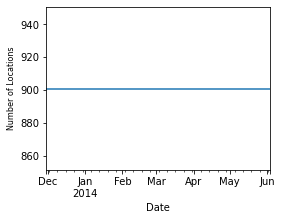

In [94]:
plt.figure(figsize=(4, 3))
wheat13_185days_nonmiss.groupby('Date').Location.count().plot()
plt.ylabel('Number of Locations', fontsize=8)
plt.savefig('./figures/date&locations(clean).png', dpi=600, bbox_inches = 'tight')

In [99]:
# 14年数据处理
wheat14 = pd.read_pickle('./data/df_2014_clean.df')

In [100]:
wheat14.groupby('Location').apply(lambda x: x.Date.max() - x.Date.min()).value_counts()

185 days    971
160 days     13
169 days     13
64 days      12
170 days      6
80 days       6
144 days      6
152 days      4
151 days      2
128 days      1
156 days      1
dtype: int64

In [103]:
days = wheat14.groupby('Location')['DayInSeason'].unique().apply(lambda x: len(x))
clean_pos = days[days==186].index.to_list()

In [104]:
wheat14_185days_nonmiss = wheat14[wheat14.Location.isin(clean_pos)]

In [105]:
wheat14_185days_nonmiss.to_pickle('./data/wheat14_185days_nonmiss.df')

Text(0, 0.5, 'Number of Locations')

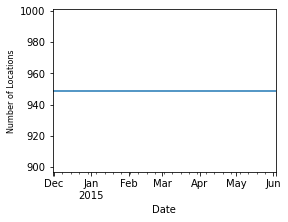

In [106]:
plt.figure(figsize=(4, 3))
wheat14_185days_nonmiss.groupby('Date').Location.count().plot()
plt.ylabel('Number of Locations', fontsize=8)
# plt.savefig('./figures/date&locations(clean).png', dpi=600, bbox_inches = 'tight')

## map

In [128]:
common_loc = wheat13_185days_nonmiss[wheat13_185days_nonmiss.Location.isin(wheat14_185days_nonmiss.Location)].Location.unique()

In [139]:
loc_13 = wheat13_185days_nonmiss[~wheat13_185days_nonmiss.Location.isin(wheat14_185days_nonmiss.Location)].Location.unique()

In [142]:
loc14 = wheat14_185days_nonmiss[~wheat14_185days_nonmiss.Location.isin(common_loc)].Location.unique()

In [149]:
common_loc[0]

(-118.6952372, 46.81168579999999)

In [171]:
import folium

m = folium.Map(
    location=[39.9, -101],
    zoom_start=4,
    zoom_control=False,
    tiles='http://webrd02.is.autonavi.com/appmaptile?lang=en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
    attr="""&copy; <a href="http://ditu.amap.com/">高德地图</a>"""
    )
# m = folium.Map(location=[39.9, -101], zoom_start=4, zoom_control=False, width='70%',height='70%')

cm_locs = folium.map.FeatureGroup(name="common locations")
# common locs 
for lng, lat, in common_loc:
    cm_locs.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.4
        )
    )
m.add_child(cm_locs)

locs_14 = folium.map.FeatureGroup(name="2014 exclusive locations")
# common locs 
for lng, lat, in loc14:
    locs_14.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4
        )
    )
m.add_child(locs_14)

locs_13 = folium.map.FeatureGroup(name="2013 exclusive locations")
# common locs 
for lng, lat, in loc_13:
    locs_13.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.4
        )
    )
m.add_child(locs_13)

In [173]:
from branca.element import Template, MacroElement
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:yellow;opacity:0.7;'></span>Common Locations</li>
    <li><span style='background:blue;opacity:0.7;'></span>2014 exclusive locations</li>
    <li><span style='background:green;opacity:0.7;'></span>2013 exclusive locations</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m.save("map.htmp")